<a href="https://colab.research.google.com/github/SoniaPMi/AI-3-PyTorch/blob/main/CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import torch 
import torchvision
import torchvision.transforms  as transforms
import torch
import torch.nn as nn
import torchvision
from __future__ import print_function, division
import os
from torchvision import datasets, models, transforms
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [2]:
transforms = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

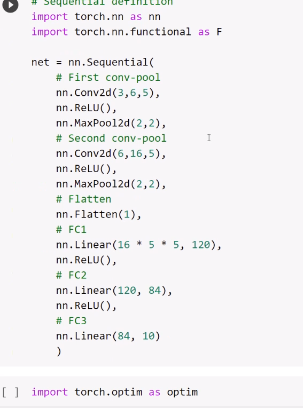

In [3]:
batch_size = 4 
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data


In [4]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms)

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

Files already downloaded and verified


In [5]:
classes = ('plane', 'car', 'bird', 'car', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

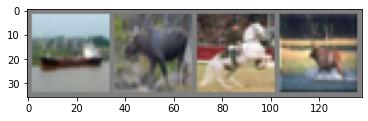

 ship  deer horse  deer


In [6]:
import matplotlib.pyplot as plt
import numpy as np

#functions to show an image
def imshow(img):
  img = img / 2 + 0.5 # unnormalize
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

#show images
imshow(torchvision.utils.make_grid(images))
#print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(labels.size(0))))

In [9]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(3, 6, 5)
    self.pool = nn.MaxPool2d(2,2)
    self.conv2 = nn.Conv2d(6,16,5)
    self.fc1 = nn.Linear(16*5*5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

#CNN AE

In [20]:
class Autoencoder(nn.Module):
  def __init__(self):
    super(Autoencoder, self).__init__()
    #encoder
    self.enc1 = nn.Conv2d(in_channels = 3, out_channels=8, kernel_size=3)
    self.enc2 = nn.Conv2d(in_channels = 8, out_channels = 4, kernel_size = 3)
    self.dec1 = nn.ConvTranspose2d(in_channels = 4, out_channels = 8, kernel_size = 3)
    self.dec2 = nn.ConvTranspose2d(in_channels = 8, out_channels = 3, kernel_size = 3)

  def forward(self, x):
    x = F.relu(self.enc1(x))
    x = F.relu(self.enc2(x))
    x = F.relu(self.dec1(x))
    x = F.relu(self.dec2(x))

In [27]:
model = Autoencoder().to(device)

NameError: ignored

In [29]:
criterion = torch.nn.MSELoss() #binaryCrossentropy
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [32]:
NUM_EPOCHS = 10
train_loss = []
model.train()
for epoch in range(NUM_EPOCHS):
  running_loss = 0.0
  for data in trainloader:
    img, _ = data
    img = img.to(device)
    optimizer.zero_grad()
    outputs = model(img)
    loss = criterion(outputs, img)
    loss.backward()
    optimizer.step()
    runnig_loss += loss.item()*img.size(0)

  loss = runnig_loss / len(trainloader)
  train_loss.append(loss)
  print("Epoch {} of {}, Train Loss: {: .3f}".format(epoch+1, NUM_EPOCH, loss))

NameError: ignored